In [14]:
import pandas as pd

df = pd.read_parquet('/workspace/hyo/dataset/sentence.parquet')
df

,eeg,text
0,"[0.13733967, 0.18169284, 0.38413203, 0.4809076...",Presents a good case while failing to provide ...
1,"[0.16575584, 0.2107761, 0.439003, 0.48779473, ...","Beautifully crafted, engaging filmmaking that ..."
2,"[0.15700871, 0.2056257, 0.5326734, 0.5711622, ...","Bread, My Sweet has so many flaws it would be ..."
3,"[0.20484078, 0.21388069, 0.54237986, 0.5683557...","Slow, silly and unintentionally hilarious."
4,"[0.15562019, 0.16817844, 0.41888723, 0.5546187...","Ultimately feels emp11111ty and unsatisfying, ..."
...,...,...
25611,"[0.89015937, 1.1351022, 1.4240658, 0.94450694,...",He also created the Defense Intelligence Agenc...
25612,"[0.9419456, 1.0275433, 1.4124604, 0.956785, 0....",He was one of the founder members of the Lunar...
25613,"[0.61234003, 0.75104165, 0.8658019, 1.0377645,...",Bush co-founded the first charter school in th...
25614,"[1.0055131, 1.3303835, 1.6090103, 1.2898368, 0...",He was the founder and first president of the ...


In [15]:
# nan 값 확인
print("\n=== NaN 값 확인 ===")
print(df.isna().sum())


=== NaN 값 확인 ===
eeg     0
text    0
dtype: int64


In [16]:
# 텍스트 전처리
df['text'] = df['text'].str.lower()  # 소문자 변환
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)  # 특수문자 제거
df

,eeg,text
0,"[0.13733967, 0.18169284, 0.38413203, 0.4809076...",presents a good case while failing to provide ...
1,"[0.16575584, 0.2107761, 0.439003, 0.48779473, ...",beautifully crafted engaging filmmaking that s...
2,"[0.15700871, 0.2056257, 0.5326734, 0.5711622, ...",bread my sweet has so many flaws it would be e...
3,"[0.20484078, 0.21388069, 0.54237986, 0.5683557...",slow silly and unintentionally hilarious
4,"[0.15562019, 0.16817844, 0.41888723, 0.5546187...",ultimately feels emp11111ty and unsatisfying l...
...,...,...
25611,"[0.89015937, 1.1351022, 1.4240658, 0.94450694,...",he also created the defense intelligence agenc...
25612,"[0.9419456, 1.0275433, 1.4124604, 0.956785, 0....",he was one of the founder members of the lunar...
25613,"[0.61234003, 0.75104165, 0.8658019, 1.0377645,...",bush cofounded the first charter school in the...
25614,"[1.0055131, 1.3303835, 1.6090103, 1.2898368, 0...",he was the founder and first president of the ...


In [19]:
df['text'].iloc[4] = "ultimately feels empty and unsatisfying like swallowing a communion wafer without the wine"

/tmp/ipykernel_528641/1379047527.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['text'].iloc[4] = "ultimately feels empty and unsatisfying like swallowing a communion wafer without the wine"


In [24]:
# 중복된 텍스트 확인
duplicate_texts = df['text'].value_counts()
print("\n=== 중복된 텍스트 및 개수 ===")
print(duplicate_texts[duplicate_texts > 1])

# 중복된 행 확인
duplicate_rows = df[df.duplicated(['text'], keep=False)]
print("\n=== 중복된 행 ===")
duplicate_rows


=== 중복된 텍스트 및 개수 ===
text
webster english young december 3 1932  december 13 2003 was an american jazz trumpeter and cornetist                                                                    68
in 1964 she went to reprise again shifting the next year to dot records                                                                                                 63
he is of three quarters irish and one quarter french descent                                                                                                            60
with his interest in race cars he formed a second company the henry ford company                                                                                        59
after a twoday trial she was banished as a heretic in 1638 and led 60 followers to settle aquidneck island in what later became rhode island                            58
                                                                                                                      

,eeg,text
0,"[0.13733967, 0.18169284, 0.38413203, 0.4809076...",presents a good case while failing to provide ...
1,"[0.16575584, 0.2107761, 0.439003, 0.48779473, ...",beautifully crafted engaging filmmaking that s...
2,"[0.15700871, 0.2056257, 0.5326734, 0.5711622, ...",bread my sweet has so many flaws it would be e...
3,"[0.20484078, 0.21388069, 0.54237986, 0.5683557...",slow silly and unintentionally hilarious
5,"[0.16772616, 0.18075526, 0.37075943, 0.4463555...",exudes the fizz of a busby berkeley musical an...
...,...,...
25611,"[0.89015937, 1.1351022, 1.4240658, 0.94450694,...",he also created the defense intelligence agenc...
25612,"[0.9419456, 1.0275433, 1.4124604, 0.956785, 0....",he was one of the founder members of the lunar...
25613,"[0.61234003, 0.75104165, 0.8658019, 1.0377645,...",bush cofounded the first charter school in the...
25614,"[1.0055131, 1.3303835, 1.6090103, 1.2898368, 0...",he was the founder and first president of the ...


In [25]:
df[df['text'] == 'slow silly and unintentionally hilarious']

,eeg,text
3,"[0.20484078, 0.21388069, 0.54237986, 0.5683557...",slow silly and unintentionally hilarious
403,"[1.4946712, 1.8203789, 2.1184878, 2.1901925, 1...",slow silly and unintentionally hilarious
803,"[0.7538463, 0.6662127, 0.92850536, 0.8037925, ...",slow silly and unintentionally hilarious
1102,"[0.41100627, 0.5701258, 0.7317187, 1.0100203, ...",slow silly and unintentionally hilarious
1502,"[0.26552504, 0.29574183, 0.39119935, 0.6738545...",slow silly and unintentionally hilarious
1902,"[0.15139966, 0.23652825, 0.43877473, 0.2824579...",slow silly and unintentionally hilarious
2302,"[0.33203524, 0.29610687, 0.29613543, 0.3319868...",slow silly and unintentionally hilarious
2702,"[0.39542332, 1.5194436, 1.8551817, 1.4593675, ...",slow silly and unintentionally hilarious
3102,"[0.98207295, 1.5030301, 1.5346699, 1.5850328, ...",slow silly and unintentionally hilarious
3502,"[0.4442448, 0.8985687, 1.0265182, 1.2217659, 0...",slow silly and unintentionally hilarious


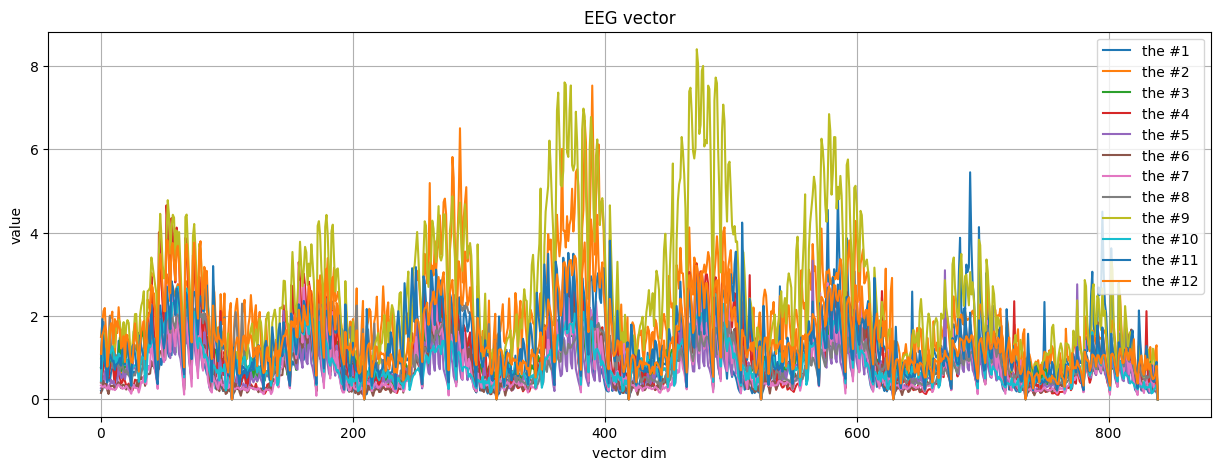

문장 출현 횟수: 12

EEG 벡터 통계:
평균 길이: 840
평균값: 0.9541


In [28]:
import matplotlib.pyplot as plt

the_rows = df[df['text'] == 'slow silly and unintentionally hilarious']

plt.figure(figsize=(15, 5))
for i in range(12):
    plt.plot(the_rows.iloc[i]['eeg'], label=f'the #{i+1}')
plt.title("EEG vector")
plt.xlabel('vector dim')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.show()

# 통계 정보 출력
print(f"문장 출현 횟수: {len(the_rows)}")
print("\nEEG 벡터 통계:")
print(f"평균 길이: {len(the_rows.iloc[0]['eeg'])}")
print(f"평균값: {sum(the_rows.iloc[0]['eeg'])/len(the_rows.iloc[0]['eeg']):.4f}")

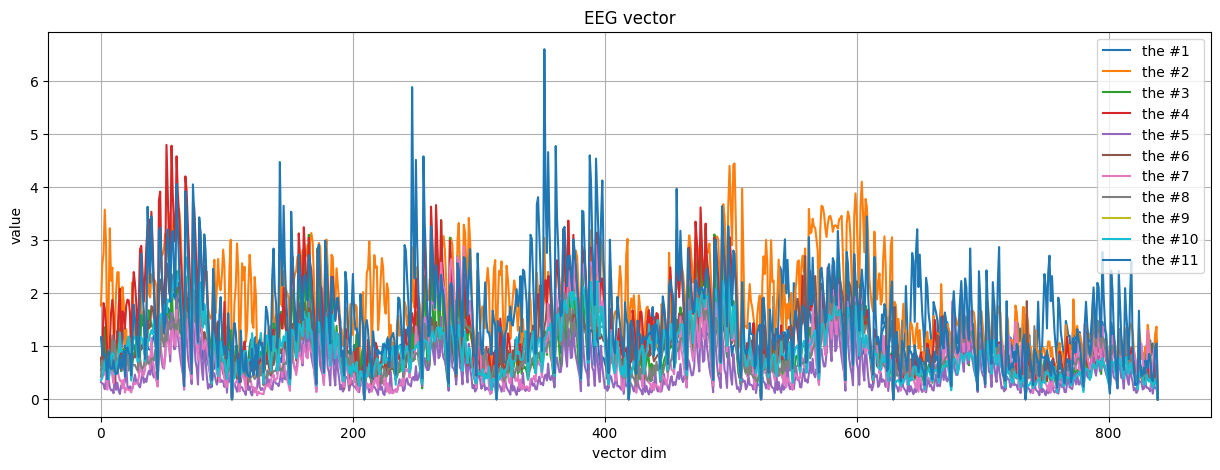

문장 출현 횟수: 11

EEG 벡터 통계:
평균 길이: 840
평균값: 1.0625


In [30]:
import matplotlib.pyplot as plt

the_rows = df[df['text'] == 'after the media caught wind of the comment he apologized']

plt.figure(figsize=(15, 5))
for i in range(11):
    plt.plot(the_rows.iloc[i]['eeg'], label=f'the #{i+1}')
plt.title("EEG vector")
plt.xlabel('vector dim')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.show()

# 통계 정보 출력
print(f"문장 출현 횟수: {len(the_rows)}")
print("\nEEG 벡터 통계:")
print(f"평균 길이: {len(the_rows.iloc[0]['eeg'])}")
print(f"평균값: {sum(the_rows.iloc[0]['eeg'])/len(the_rows.iloc[0]['eeg']):.4f}")

In [35]:
len(df['text'].unique())

1538

In [36]:
import pandas as pd

word = pd.read_parquet('/workspace/hyo/dataset/word.parquet')
len(word['text'].unique())

8855

In [37]:
word

,sent_id,eeg,text
0,0,"[1.0205427408218384, 1.3670059442520142, 2.145...",won
1,0,"[0.5259642601013184, 0.6915981769561768, 1.300...",gold
2,0,"[0.3969021439552307, 0.43188485503196716, 0.38...",medal
3,0,"[1.1179816722869873, 1.3917293548583984, 0.836...",the
4,0,"[0.9042049050331116, 1.1630990505218506, 1.425...",royal
...,...,...,...
306206,25615,"[0.18291252851486206, 0.9274558424949646, 1.31...",was
306207,25615,"[0.1011890396475792, 1.0737792253494263, 1.630...",running
306208,25615,"[0.5648945569992065, 0.8450214266777039, 1.163...",oil
306209,25615,"[0.25938403606414795, 0.549377977848053, 1.269...",drilling


In [38]:
# nan 값 확인
print("\n=== NaN 값 확인 ===")
print(word.isna().sum())


=== NaN 값 확인 ===
sent_id    0
eeg        0
text       0
dtype: int64


In [175]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os

In [176]:
LATENT_DIM = 128
N_Q        = 12
N_EMB      = 64
CODEBOOK_SIZE = 1024 # 1024

In [177]:
class RVQ(nn.Module):
    """Residual Vector Quantization with multiple codebooks."""
    def __init__(self, num_quantizers=N_Q, num_embeddings=N_EMB, embedding_dim=LATENT_DIM):
        super().__init__()
        self.num_quantizers = num_quantizers
        self.embedding_dim = embedding_dim
        self.codebooks = nn.ModuleList(
            [nn.Embedding(num_embeddings, embedding_dim) for _ in range(num_quantizers)]
        )

    def forward(self, z):
        # z: (B, L, D)
        residual = z
        quantized = torch.zeros_like(z)
        all_indices = []
        for codebook in self.codebooks:
            weight = codebook.weight  # (K, D)
            # compute L2 distance
            dist = ((residual.unsqueeze(2) - weight.unsqueeze(0).unsqueeze(0))**2).sum(-1)
            indices = dist.argmin(-1)        # (B, L)
            all_indices.append(indices)
            q = F.embedding(indices, weight) # (B, L, D)
            quantized += q
            residual = 0.93 * (residual - q)
            # residual = residual - q
        return quantized, all_indices

In [178]:
class ConvEEGEncoder(nn.Module):
    """
    840-dim 벡터를 1×840 시퀀스로 보고 Conv1D 두 층으로 잠재표현 생성
    출력은 (B, latent_dim)
    """
    def __init__(self, input_dim=840, latent_dim=LATENT_DIM, hidden=256):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv1d(1, hidden, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv1d(hidden, latent_dim, kernel_size=3, padding=1), nn.ReLU()
        )
        self.pool = nn.AdaptiveAvgPool1d(1)   # 길이 840 → 1 로 압축

    def forward(self, x):           # x: (B, feat)
        x = x.unsqueeze(1)          # (B, 1, 840)
        z = self.conv_stack(x)      # (B, latent_dim, 840)
        z = self.pool(z).squeeze(-1)  # (B, latent_dim)
        return z

class ConvEEGDecoder(nn.Module):
    """
    latent (B,D) → (B,840)
    105→210→420→840 업샘플링
    """
    def __init__(self, output_dim=840, latent_dim=LATENT_DIM, hidden=256):
        super().__init__()
        self.start_len = 105                         # 105×8=840
        self.fc = nn.Linear(latent_dim, latent_dim * self.start_len)

        self.deconv = nn.Sequential(
            nn.ConvTranspose1d(latent_dim, hidden, kernel_size=4, stride=2, padding=1),  # 105→210
            nn.ReLU(),
            nn.ConvTranspose1d(hidden, hidden, kernel_size=4, stride=2, padding=1),      # 210→420
            nn.ReLU(),
            nn.ConvTranspose1d(hidden, 1, kernel_size=4, stride=2, padding=1)            # 420→840
        )

    def forward(self, zq):                # (B, latent)
        h = self.fc(zq).view(zq.size(0), -1, self.start_len)  # (B, latent, 105)
        x_hat = self.deconv(h)            # (B, 1, 840)
        return x_hat.squeeze(1)           # (B, 840)

In [179]:
class ConvRVQAutoEncoder(nn.Module):
    def __init__(self, feat=840, latent=LATENT_DIM, n_q=N_Q, n_emb=CODEBOOK_SIZE, hidden=256):
        super().__init__()
        self.enc = ConvEEGEncoder(feat, latent, hidden)
        self.rvq = RVQ(num_quantizers=n_q, num_embeddings=n_emb, embedding_dim=latent)
        self.dec = ConvEEGDecoder(feat, latent, hidden)

    def forward(self, x):           # x: (B, 840)
        z = self.enc(x)             # (B, latent)
        zq, indices = self.rvq(z.unsqueeze(1))  # (B, 1, D)
        zq = zq.squeeze(1)          # (B, D) — 디코더용으로 다시 압축
        x_hat = self.dec(zq)        # (B, 840)
        return x_hat, z, zq, indices

In [180]:
def rvq_loss(x, x_hat, z, z_q, beta=0.05):
    # 재구성 손실 (L_R)
    reconstruction_loss = F.mse_loss(x_hat, x)

    # 코드북 손실 (첫 번째 항 of L_VQ)
    # z는 인코더 출력 z_e(x), z_q는 양자화된 벡터 e
    # sg[z_e(x)] - e  <-->  z.detach() - z_q
    codebook_loss = F.mse_loss(z.detach(), z_q)

    # 커밋먼트 손실 (두 번째 항 of L_VQ)
    # z_e(x) - sg[e]  <-->  z - z_q.detach()
    commitment_loss = F.mse_loss(z, z_q.detach())

    # 전체 손실: L_R + L_VQ (여기서 L_VQ = codebook_loss + beta * commitment_loss)
    # 논문에서는 L_VQ의 두 항에 대한 상대적 가중치를 명시하지 않았으므로,
    # 코드북 손실의 가중치는 1로 가정합니다.
    return reconstruction_loss, codebook_loss, beta * commitment_loss

In [181]:
import glob
import pandas as pd
from torch.utils.data import Dataset, DataLoader

class EEGVecDataset(Dataset):
    """
    EEG word-level feature 벡터 하나를 그대로 토큰으로 사용.
    """
    def __init__(self, np_array):              # np_array: (N, feat)
        mu, std = np_array.mean(0, keepdims=True), np_array.std(0, keepdims=True)+1e-8
        self.data = (np_array - mu) / std      # 정규화
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return torch.from_numpy(self.data[idx])    # shape: (feat,)

In [182]:
import random
from torch.utils.data import Sampler

class UniqueFirstSampler(Sampler):
    """
    에폭마다:
      ① unique 인덱스 1,538개를 랜덤 순서로 모두 배치
      ② 남은 duplicate 인덱스를 랜덤 순서로 뒤에 붙임
    """
    def __init__(self, uniq_idx, dup_idx, shuffle=True):
        self.uniq_idx = uniq_idx
        self.dup_idx  = dup_idx
        self.shuffle  = shuffle

    def __iter__(self):
        if self.shuffle:
            random.shuffle(self.uniq_idx)
            random.shuffle(self.dup_idx)
        # unique 우선 + duplicate
        full_order = self.uniq_idx + self.dup_idx
        return iter(full_order)

    def __len__(self):
        return len(self.uniq_idx) + len(self.dup_idx)

In [183]:
# (1) 벡터 수집 --------------------------------------------------------
data_dir   = "/workspace/hyo/dataset/sentence.parquet"
df = pd.read_parquet(data_dir)
eeg_vecs = df["eeg"].to_numpy()

arr = np.stack(eeg_vecs).astype(np.float32)
arr = np.nan_to_num(arr, nan=0.0, posinf=0.0, neginf=0.0)

print(arr.shape, arr.dtype)  # → (N, 840) float32

unique_mask = ~df["text"].duplicated(keep="first")
unique_indices     = np.where(unique_mask)[0].tolist()        # 1 538개
duplicate_indices  = np.where(~unique_mask)[0].tolist()       # 24 078개

print(f"unique {len(unique_indices)}, duplicate {len(duplicate_indices)}")

# 5) Dataset & DataLoader
dataset = EEGVecDataset(arr)             # now each item is (840,) vector
# loader  = DataLoader(dataset, batch_size=256, shuffle=True)

(25616, 840) float32
unique 1547, duplicate 24069


In [184]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [185]:
import faiss                          # ① K-means용 라이브러리 (pip install faiss-cpu)

def kmeans_init(model, dataloader, k=CODEBOOK_SIZE, max_samples=30000):
    """
    encoder latent 샘플 → K-means → centroids(Tensor, k×latent_dim)
    - k가 데이터 수보다 크면 k = 데이터 수 // 2 로 자동 축소
    """
    buf = []
    with torch.no_grad():
        for x in dataloader:
            buf.append(model.enc(x.to(device)))
            if len(torch.cat(buf)) >= max_samples:
                break
    latent = torch.cat(buf).cpu().numpy()         # (S, latent_dim)
    n_train = latent.shape[0]

    if n_train < k * 40:                          # faiss 권장치 미달 시 k 축소
        k_new = max(8, n_train // 40)
        print(f"⚠️  samples({n_train}) ≪ {k}×40,  k→{k_new}")
        k = k_new

    import faiss
    km = faiss.Kmeans(d=latent.shape[1], k=k, niter=20, verbose=False)
    km.train(latent)

    # 대부분의 faiss 버전은 km.centroids 속성 사용
    return torch.tensor(km.centroids).float()     # (k, latent_dim)

def usage_loss(idx_list, num_emb, lam_vec):
    losses = []
    for idx, lam in zip(idx_list, lam_vec):
        flat = idx.view(-1)
        hist = torch.bincount(flat, minlength=num_emb).float()
        p = hist / hist.sum()
        entropy = -(p[p>0] * torch.log(p[p>0])).sum()
        losses.append(-lam * entropy)
    return sum(losses)

In [186]:
model = ConvRVQAutoEncoder().to(device)

tmp_loader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=0)

with torch.no_grad():
    for t in range(N_Q):
        # ── 1) latent 수집 (잔차 계산 생략) ───────────────────────────
        buf = []
        for x in tmp_loader:
            z = model.enc(x.to(device))      # (B, 128)
            buf.append(z)
            if len(torch.cat(buf)) >= 20000:
                break
        latent = torch.cat(buf).cpu().numpy()

        # ── 2) K-means & 코드북 덮어쓰기 ───────────────────────────
        k = min(CODEBOOK_SIZE, latent.shape[0] // 40) or 8
        km = faiss.Kmeans(d=latent.shape[1], k=k, niter=15, verbose=False)
        km.train(latent)
        centroids = torch.tensor(km.centroids).float()

        cb = model.rvq.codebooks[t].weight           # (1024, 128)
        kk = min(cb.size(0), centroids.size(0))
        cb[:kk].copy_(centroids[:kk].to(device))
print("✔ all codebooks initialised (K-means per level)")

✔ all codebooks initialised (K-means per level)


In [187]:
STAGE_EPOCH = 5        # 0-1ep: level0, 2-3ep: level0-1, …
LAMBDA_USAGE = 0.05
RECON_THR  = 0.98      # 재구성 MSE가 0.50 보다 작을 때만
USAGE_THR  = -0.30     # usage_loss 가 -0.05 보다 작을 때만 (엔트로피↑)
SIGMA = 0.05              # dead-code 재초기화 범위
DEAD_THRESH = 0.03

In [188]:
import torch.optim as optim
import csv
import os

init_lr   = 5e-4
optimizer = optim.AdamW(model.parameters(), lr=init_lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.7,
    patience=1,
    verbose=True,
    min_lr=5e-5
)

#── 로그 파일 준비 ──
log_path = "/workspace/hyo/model/rvq_best_model_sen.log"

#── 학습 루프 ──
best_loss = float('inf')
best_model_path = "/workspace/hyo/model/rvq_best_model_sen.pt"

for epoch in range(30):
    cum_loss   = 0.0
    cum_recon  = 0.0
    cum_code   = 0.0
    cum_commit = 0.0
    cum_usage  = 0.0
    steps = 0

    # ── 3-A. 현재 활성 스테이지 계산 & freeze ──
    cur_stage = min(epoch // STAGE_EPOCH, N_Q - 1)
    for l, cb in enumerate(model.rvq.codebooks):
        cb.weight.requires_grad_(l <= cur_stage)

    # encoder warm-up(앞 2 epoch freeze)
    enc_grad = epoch >= 2
    for p in model.enc.parameters():
        p.requires_grad = enc_grad

    sampler = UniqueFirstSampler(unique_indices.copy(),   # copy() 해야 epoch마다 새로 섞기 쉬움
                                 duplicate_indices.copy(),
                                 shuffle=True)
    
    loader = DataLoader(dataset, batch_size=256, sampler=sampler, num_workers=0)

    active_sets = [set() for _ in range(N_Q)]

    for x in loader:
        steps += 1
        x = x.to(device)

        optimizer.zero_grad()
        x_hat, z, z_q, idx_list = model(x)

        # ── active code 집계 ───────────────────────────────
        for l, idx in enumerate(idx_list):
            active_sets[l].update(idx.view(-1).tolist())

        recon_loss, codebook_loss, commit_loss = rvq_loss(x, x_hat, z, z_q)

        # lam_vec = [0.03,0.04,0.06,0.08,0.12,0.15,0.18,0.20]
        # lam_vec = [0.20,0.18,0.15,0.12,0.10,0.08,0.06,0.04]
        # lam_vec = [0.25,0.20,0.15,0.12,0.10,0.08,0.06,0.05,0.04,0.03,0.02,0.01]
        lam_vec = [0.05,0.06,0.07,0.08,0.08,0.08,0.07,0.06,0.05,0.04,0.03,0.02]
        u_loss = usage_loss(idx_list, CODEBOOK_SIZE, lam_vec)
        # u_loss = usage_loss(idx_list, CODEBOOK_SIZE, lam=LAMBDA_USAGE)

        loss = recon_loss + codebook_loss + commit_loss + u_loss
        loss.backward()
        optimizer.step()

        cum_loss   += loss.item()
        cum_recon  += recon_loss.item()
        cum_code   += codebook_loss.item()
        cum_commit += commit_loss.item()
        cum_usage  += u_loss.item()

        if steps % 30 == 0:
            avg_loss  = cum_loss   / steps
            avg_recon = cum_recon  / steps
            avg_code  = cum_code   / steps
            avg_commit= cum_commit / steps
            avg_usage = cum_usage  / steps
            with open(log_path, "a") as f:
                f.write(f"[Epoch {epoch} | Step {steps}] avg loss {avg_loss:.4f}, recon {avg_recon:.4f}, code {avg_code:.4f}, commit {avg_commit:.4f}, usage {avg_usage:.4f}\n")

    # 에폭 말 평균 계산
    avg_loss   = cum_loss   / steps
    avg_recon  = cum_recon  / steps
    avg_code   = cum_code   / steps
    avg_commit = cum_commit / steps
    avg_usage  = cum_usage  / steps
    
    # ── epoch 끝: dead-code 재초기화 ───────────────────────
    with torch.no_grad():
        for l, cb in enumerate(model.rvq.codebooks):
            used = len(active_sets[l])
            usage_ratio = used / CODEBOOK_SIZE
            if usage_ratio < DEAD_THRESH:
                # weight re-init (uniform[-σ,σ])
                cb.weight.uniform_(-SIGMA, SIGMA)
                print(f"[Epoch {epoch}] level {l} dead-code reset "
                      f"(usage {usage_ratio:.2%})\n")

    # 스케줄러 업데이트
    scheduler.step(avg_recon)
    current_lr = optimizer.param_groups[0]['lr']

    # 로그 출력
    with open(log_path, "a") as f:
        f.write(f"=== Epoch {epoch} === avg loss {avg_loss:.4f}, recon {avg_recon:.4f}, code {avg_code:.4f}, commit {avg_commit:.4f}, usage {avg_usage:.4f}, lr {current_lr:.2e}\n")
    
    # trade-off 모델 저장
    save_cond = (avg_recon < RECON_THR) and (avg_usage < USAGE_THR)
    # if save_cond and avg_loss < best_loss:
    if save_cond and avg_loss > 0:
        best_loss = avg_loss
        ckpt = {
            "encoder": model.enc.state_dict(),
            "codebooks": [cb.weight.detach().cpu() for cb in model.rvq.codebooks]
        }
        torch.save(ckpt, best_model_path)
        with open(log_path, "a") as f:
            f.write(
                f"New best model saved! "
                f"loss {best_loss:.4f}, recon {avg_recon:.4f}, usage {avg_usage:.4f}\n"
            )

    # # best 모델 저장
    # if avg_loss < best_loss:
    #     best_loss = avg_loss
    #     ckpt = {
    #         "encoder": model.enc.state_dict(),
    #         "codebooks": [cb.weight.detach().cpu() for cb in model.rvq.codebooks]
    #     }
    #     torch.save(ckpt, best_model_path)
    #     with open(log_path, "a") as f:
    #         f.write(f"New best model saved! Loss: {best_loss:.4f}\n")

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[Epoch 0] level 1 dead-code reset (usage 0.59%)

[Epoch 0] level 2 dead-code reset (usage 0.20%)

[Epoch 0] level 3 dead-code reset (usage 0.29%)

[Epoch 0] level 4 dead-code reset (usage 0.10%)

[Epoch 0] level 5 dead-code reset (usage 0.10%)

[Epoch 0] level 6 dead-code reset (usage 0.10%)

[Epoch 0] level 7 dead-code reset (usage 0.10%)

[Epoch 0] level 8 dead-code reset (usage 0.20%)

[Epoch 0] level 9 dead-code reset (usage 0.20%)

[Epoch 0] level 10 dead-code reset (usage 0.10%)

[Epoch 0] level 11 dead-code reset (usage 0.10%)

[Epoch 7] level 0 dead-code reset (usage 0.68%)

[Epoch 10] level 0 dead-code reset (usage 1.07%)

[Epoch 16] level 0 dead-code reset (usage 2.64%)

[Epoch 19] level 0 dead-code reset (usage 2.83%)



In [ ]:
####################################################################
# 0)  경로 & 환경
####################################################################
import torch, math, numpy as np, pandas as pd
from torch import nn
from torch.utils.data import DataLoader, Dataset
from collections import Counter
from pathlib import Path

CKPT_PATH  = Path('/workspace/hyo/model/rvq_best_model_sen.pt')
DATA_PATH  = Path('/workspace/hyo/dataset/sentence.parquet')
BATCH_SIZE = 256
DEVICE     = 'cuda' if torch.cuda.is_available() else 'cpu'

####################################################################
# 1)  네트워크 정의 (학습 코드 그대로)
####################################################################
class RVQ(nn.Module):
    """Residual Vector Quantization with multiple codebooks."""
    def __init__(self, num_quantizers=N_Q, num_embeddings=N_EMB, embedding_dim=LATENT_DIM):
        super().__init__()
        self.num_quantizers = num_quantizers
        self.embedding_dim = embedding_dim
        self.codebooks = nn.ModuleList(
            [nn.Embedding(num_embeddings, embedding_dim) for _ in range(num_quantizers)]
        )

    def forward(self, z):
        # z: (B, L, D)
        residual = z
        quantized = torch.zeros_like(z)
        all_indices = []
        for codebook in self.codebooks:
            weight = codebook.weight  # (K, D)
            # compute L2 distance
            dist = ((residual.unsqueeze(2) - weight.unsqueeze(0).unsqueeze(0))**2).sum(-1)
            indices = dist.argmin(-1)        # (B, L)
            all_indices.append(indices)
            q = F.embedding(indices, weight) # (B, L, D)
            quantized += q
            residual = 0.93 * (residual - q)
            # residual = residual - q
        return quantized, all_indices

class ConvEEGEncoder(nn.Module):
    """
    840-dim 벡터를 1×840 시퀀스로 보고 Conv1D 두 층으로 잠재표현 생성
    출력은 (B, latent_dim)
    """
    def __init__(self, input_dim=840, latent_dim=LATENT_DIM, hidden=256):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv1d(1, hidden, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv1d(hidden, latent_dim, kernel_size=3, padding=1), nn.ReLU()
        )
        self.pool = nn.AdaptiveAvgPool1d(1)   # 길이 840 → 1 로 압축

    def forward(self, x):           # x: (B, feat)
        x = x.unsqueeze(1)          # (B, 1, 840)
        z = self.conv_stack(x)      # (B, latent_dim, 840)
        z = self.pool(z).squeeze(-1)  # (B, latent_dim)
        return z

####################################################################
# 2)  체크포인트 로드 → 인스턴스 복원
####################################################################
ckpt = torch.load(CKPT_PATH, map_location='cpu')

# ── encoder ──
enc_sd = ckpt['encoder']                     # state_dict (len 4)
latent_dim = enc_sd['conv_stack.2.weight'].shape[0]   # out_channels of 2nd conv
encoder = ConvEEGEncoder(input_dim=840, latent_dim=latent_dim, hidden=enc_sd['conv_stack.0.weight'].shape[0])
encoder.load_state_dict(enc_sd)
encoder = encoder.to(DEVICE).eval()

# ── RVQ ──
codebooks = ckpt['codebooks']                # list of np.arrays
n_q    = len(codebooks)
K      = codebooks[0].shape[0]
rvq    = RVQ(num_quantizers=n_q, num_embeddings=K, embedding_dim=latent_dim)
with torch.no_grad():
    for l, w in enumerate(codebooks):
        rvq.codebooks[l].weight.data.copy_(torch.tensor(w))
rvq = rvq.to(DEVICE).eval()

print(f"★ Encoder latent_dim = {latent_dim},  RVQ: {n_q}×{K} codebooks")

####################################################################
# 3)  데이터 로드 → DataLoader (raw 840-dim 벡터)
####################################################################
class EEGVecDataset(Dataset):
    """
    EEG word-level feature 벡터 하나를 그대로 토큰으로 사용.
    """
    def __init__(self, np_array):              # np_array: (N, feat)
        mu, std = np_array.mean(0, keepdims=True), np_array.std(0, keepdims=True)+1e-8
        self.data = (np_array - mu) / std      # 정규화
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return torch.from_numpy(self.data[idx])    # shape: (feat,)

df = pd.read_parquet(DATA_PATH)

# # 10%의 데이터만 사용
# df = df.sample(frac=0.1, random_state=42)

eeg_vecs = df["eeg"].to_numpy()

arr = np.stack(eeg_vecs).astype(np.float32)
arr = np.nan_to_num(arr, nan=0.0, posinf=0.0, neginf=0.0)

print(arr.shape, arr.dtype)  # → (N, 840) float32

# 5) Dataset & DataLoader
ds = EEGVecDataset(arr)             # now each item is (840,) vector
loader  = DataLoader(ds, batch_size=256, shuffle=True)

####################################################################
# 4)  평가 루프  (encoder vs. RVQ 복원)
####################################################################
mse_tot, code_hist = 0.0, Counter()
with torch.no_grad():
    for x in loader:                        # x: (B, 840)
        x = x.to(DEVICE)                    # (B, 1, 840) → (B, L=1, 840)
        z = encoder(x)                      # (B, latent)
        z = z.unsqueeze(1)
        zq, idx_list = rvq(z)               # (B, latent), (B, n_q)
        idx = torch.stack(idx_list, dim=1).squeeze(-1)
        mse_tot += torch.mean((z - zq)**2).item() * x.size(0)
        for lvl, indices in enumerate(idx.t()):
            code_hist.update([(lvl, i.item()) for i in indices])

mse  = mse_tot / len(ds)
psnr = 10 * math.log10(1.0 / mse)

####################################################################
# 5)  코드북 사용률·퍼플렉시티
####################################################################
print(f"\n==== RVQ 평가 결과 ====")
print(f"샘플 수           : {len(ds):,}")
print(f"Reconstruction MSE: {mse:.4e}")
print(f"PSNR             : {psnr:.2f} dB\n")

print("레벨별 codebook 사용률 / perplexity")
for lvl in range(n_q):
    used = [cid for (lv, cid) in code_hist if lv == lvl]
    usage = len(set(used)) / K * 100
    entropy = -sum((used.count(c)/len(used))*math.log(used.count(c)/len(used)+1e-9)
                   for c in set(used))
    perp = math.exp(entropy)
    print(f"  Level {lvl:2d}: usage {usage:6.2f}% | perplexity {perp:7.2f}")

/tmp/ipykernel_981385/1404913489.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rvq.codebooks[l].weight.data.copy_(torch.tensor(w))


★ Encoder latent_dim = 128,  RVQ: 12×1024 codebooks
(25616, 840) float32

==== RVQ 평가 결과 ====
샘플 수           : 25,616
Reconstruction MSE: 2.4682e-03
PSNR             : 26.08 dB

레벨별 codebook 사용률 / perplexity
  Level  0: usage   0.20% | perplexity    2.00
  Level  1: usage   0.39% | perplexity    4.00
  Level  2: usage   0.29% | perplexity    3.00
  Level  3: usage   0.88% | perplexity    9.00
  Level  4: usage   1.07% | perplexity   11.00
  Level  5: usage   1.37% | perplexity   14.00
  Level  6: usage   1.86% | perplexity   19.00
  Level  7: usage   2.34% | perplexity   24.00
  Level  8: usage   2.64% | perplexity   27.00
  Level  9: usage   4.10% | perplexity   42.00
  Level 10: usage   4.49% | perplexity   46.00
  Level 11: usage   5.27% | perplexity   54.00
